###### Assessment

###### I am going to provide two .csv files , you are supposed to work on them and have to provide solutions to the following problems

###### import necessary libraries

In [344]:
import pandas as pd


###### merge those two csv files (after getting as dataframes, get them as a single dataframe)

In [345]:
college1= pd.read_csv("college_1.csv")
college2= pd.read_csv("college_2.csv")

clg1=pd.DataFrame(college1)
clg2=pd.DataFrame(college2)

college=pd.merge(clg1,clg2,how='outer')
college.reset_index(drop=True, inplace=True)
college

C:\Users\Abish\anaconda3\lib\site-packages\pandas\core\reshape\merge.py:1141: UserWarning: You are merging on int and float columns where the float values are not equal to their int representation
  warnings.warn(


,Name,python,mysql,Previous Geekions,CodeKata Score,Department,Rising,python_en,computational_thinking
0,A.Dharani,82.0,20.0,24500,24500,Computer Science and Engineering,0,NaN,NaN
1,V.JEEVITHA,82.0,20.0,21740,21740,Computer Science and Engineering,0,NaN,NaN
2,HEMAVATHI.R,100.0,100.0,19680,19680,Computer Science and Engineering,0,NaN,NaN
3,Mugunthan S,100.0,47.0,10610,10610,Computer Science and Engineering,0,NaN,NaN
4,Sathammai.S,100.0,8.0,8980,8980,Computer Science and Engineering,0,NaN,NaN
...,...,...,...,...,...,...,...,...,...
114,praveen raj j,24.0,0.0,2380,2380,Computer Science and Engineering,0,-1.0,0.0
115,AMARNATH D,-1.0,12.0,1890,1890,Electronics and Communication Engineering,0,52.0,-1.0
116,bala,32.0,0.0,1720,1720,Electronics and Communication Engineering,0,49.0,-1.0
117,XY Z,-1.0,-1.0,0,0,Computer Science and Engineering,0,20.0,-1.0


###### Take each csv file , split that csv file into multiple categories (example csv files are added in the repo) 


###### consider if the codekata score exceeds 15000 points(present week) then make a csv on those observations as Exceeded expectations.csv


###### if  10000<codekata score<15000   (Reached_expectations.csv)



###### if  7000<codekata score<10000   (Needs_Improvement.csv)


###### if  codekate score < 7000        (Unsatisfactory.csv)

In [346]:
#Exceeded expectations
exceedExp= college['CodeKata Score']>15000
college[exceedExp].to_csv('Exceeded_expectations.csv')

#Reached_expectations
reachedExp= (10000<college['CodeKata Score']) & (college['CodeKata Score']<15000)
college[reachedExp].to_csv('Reached_expectations.csv')


In [347]:
#Needs_Improvement
needImp=(7000<college['CodeKata Score']) & (college['CodeKata Score']<10000)
college[needImp].to_csv('Needs_Improvement.csv')

#Unsatisfactory
Unsatis= college['CodeKata Score']<7000
college[Unsatis].to_csv('Unsatisfactory.csv')

###### Average of previous week geekions vs this week geekions (i.e Previous Geekions vs CodeKata Score)

In [360]:
#Average of previous week geekions
college['Previous Geekions'].mean()

3842.3529411764707

In [361]:
#Average of this week geekions
college['CodeKata Score'].mean()

4051.764705882353

###### No of students participated 

In [350]:
college['Name'].count()

119

###### #Average completion of python course or my_sql or python english or computational thinking

In [351]:
[college['python'].mean(),
college['mysql'].mean(),
college['python_en'].mean(),
college['computational_thinking'].mean()]

[54.35294117647059, 23.5, 29.65714285714286, 2.2]

###### rising star of the week (top 3 candidate who performed well in that particular week)

In [362]:
#top 3 rising star of the week 
college.sort_values("Rising", axis = 0, ascending = False).head(3)

,Name,python,mysql,Previous Geekions,CodeKata Score,Department,Rising,python_en,computational_thinking
92,shifak N,58.0,0.0,5180,8320,Electronics and Electrical Engineering,3140,0.0,0.0
102,Narasimhan Y L,-1.0,0.0,4800,6800,Computer Science and Engineering,2000,-1.0,0.0
86,Ganesh Ramkumar R,-1.0,24.0,8790,10790,Computer Science and Engineering,2000,55.0,6.0


###### Shining stars of the week (top 3 candidates who has highest geekions)

In [363]:
#top 3 Shining stars of the week
college.sort_values("Previous Geekions", axis = 0, ascending = False).head(3)

,Name,python,mysql,Previous Geekions,CodeKata Score,Department,Rising,python_en,computational_thinking
0,A.Dharani,82.0,20.0,24500,24500,Computer Science and Engineering,0,NaN,NaN
1,V.JEEVITHA,82.0,20.0,21740,21740,Computer Science and Engineering,0,NaN,NaN
2,HEMAVATHI.R,100.0,100.0,19680,19680,Computer Science and Engineering,0,NaN,NaN


###### Department wise codekata performence (pie chart)

<AxesSubplot:ylabel='CodeKata Score'>

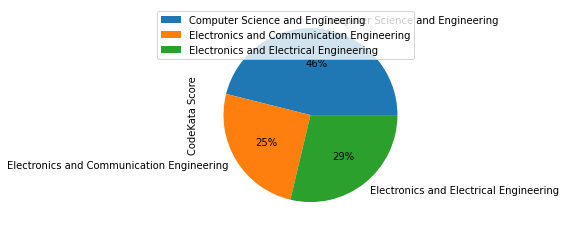

In [354]:
dept=college.pivot_table(index = 'Department', values='CodeKata Score')
dept.plot(kind='pie',y='CodeKata Score',autopct='%1.0f%%')

###### Department wise toppers (horizantal bar graph or any visual representations of your choice)

In [364]:
#cse topper
cs=(college['Department']=='Computer Science and Engineering')
cse= college[cs]

cse1= cse.sort_values(['Previous Geekions','python','mysql','CodeKata Score','computational_thinking'], ascending = False).head(1)

In [365]:
#ece topper
ec=(college['Department']=='Electronics and Communication Engineering')
ece= college[ec]

ece1= ece.sort_values(['Previous Geekions','python','mysql','CodeKata Score','computational_thinking'], ascending = False).head(1)

In [366]:
#eee topper
ee=(college['Department']=='Electronics and Electrical Engineering')
eee= college[ee]

eee1= eee.sort_values(['Previous Geekions','python','mysql','CodeKata Score','computational_thinking'], ascending = False).head(1)

<AxesSubplot:title={'center':'Department wise toppers'}, ylabel='Name'>

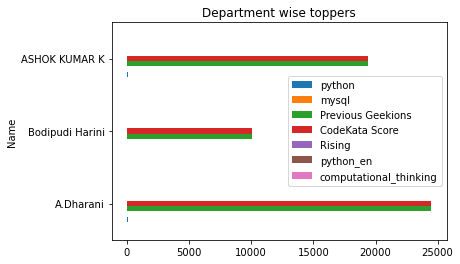

In [367]:
#combining three department topper data
frames=[cse1,ece1,eee1]
topperList= pd.concat(frames)
#plotting them on chart
topperList.plot.barh(x='Name',title='Department wise toppers')
